workflow 정리
1. desikan -> 좌표변환(x,y축 바꾸기, 바뀐 x축(axial)180도 회전 , z축 좌우변환후 270도 회전) - done

2. transformed_path = '/home/alpaco/jk/deskin/de/subjects/bert/mri/transformed_output.nii'- done

3. A = transformed_path를 T1 shape에 맞춤

4. A , T1 overay 시켜서 찍어보기
-----------

6. B = T1 에 affin변환 시키기

    (6-1) A,T1의 중심 맞추기

    (6-2) A,T1의 공백값 맞추기

    (6-3) 구조에서 유사한거 변환하기
근데 안돼

7. B 찍어보기

8. B , T1 overay 시켜서 찍어보기

9. B 에 seg overay 시키기

10. seg 부분 좌표출력 & txt 파일에서 라벨값 불러오기

정리

DESIKAN 원본
/home/alpaco/jk/deskin/de/subjects/bert/mri/aseg.auto_noCCseg.mgz

NII변환
/home/alpaco/jk/deskin/de/subjects/bert/mri/aseg.auto_noCCseg.nii

T1에 맞게 축변환
/home/alpaco/jk/deskin/de/subjects/bert/mri/transformed_output.nii'

T1에 맞게 SHAPE 변환
/home/alpaco/jk/jk_2/desikan_t1.nii

DESIKAN LABEL
/home/alpaco/jk/deskin/de/subjects/bert/mri/aseg.auto_noCCseg.label_intensities.txt

transformed_path = '/home/alpaco/jk/deskin/de/subjects/bert/mri/transformed_output.nii'

T1_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_t1.nii'

seg_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_seg.nii'

In [1]:
!pip install nibabel

# 3. A = transformed_path를 T1 shape에 맞춤

3. A = transformed_path를 T1 shape에 맞춤

T1 Data shape: (240, 240, 155)
Transformed Data shape: (256, 256, 256)


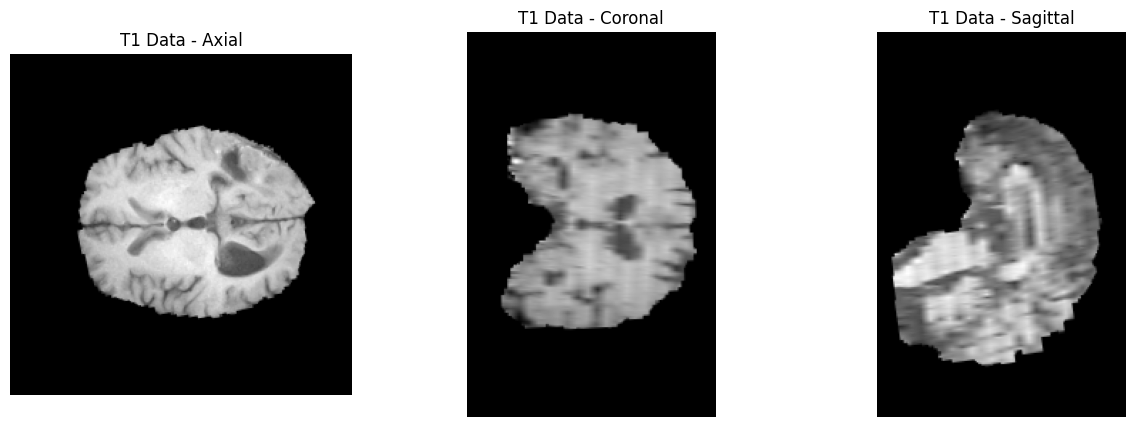

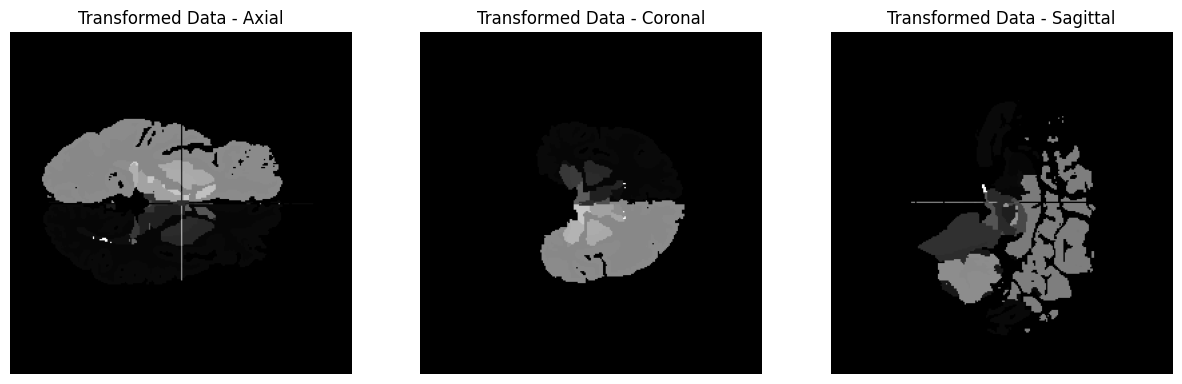

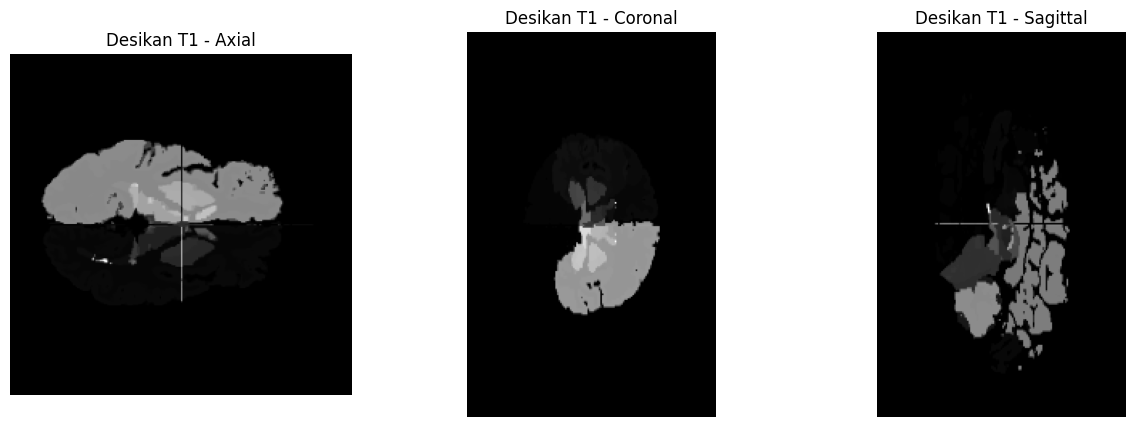

T1 Data shape: (240, 240, 155)
Transformed Data shape: (256, 256, 256)
Desikan T1 Data shape: (240, 240, 155)


In [11]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# NIfTI 파일 경로 설정
transformed_path = '/home/alpaco/jk/deskin/de/subjects/bert/mri/transformed_output.nii'
T1_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_t1.nii'

# NIfTI 파일 로드
transformed_img = nib.load(transformed_path)
T1_img = nib.load(T1_path)

# 데이터 배열 가져오기
transformed_data = transformed_img.get_fdata()
T1_data = T1_img.get_fdata()

# T1 데이터와 변환된 데이터의 shape 출력
print("T1 Data shape:", T1_data.shape)
print("Transformed Data shape:", transformed_data.shape)

# transformed_data를 T1_data의 shape에 맞게 리샘플링
zoom_factors = np.array(T1_data.shape) / np.array(transformed_data.shape)
resampled_transformed_data = zoom(transformed_data, zoom_factors, order=1)  # order=1은 선형 보간법

# resampled_transformed_data를 desikan_t1 변환값으로 저장
desikan_t1_img = nib.Nifti1Image(resampled_transformed_data, T1_img.affine)
nib.save(desikan_t1_img, 'desikan_t1.nii')

# 데이터 시각화 함수 정의
def visualize_slices(data, title):
    axial_idx = data.shape[2] // 2  # 중간 슬라이스 (축 Z)
    coronal_idx = data.shape[1] // 2  # 중간 슬라이스 (축 Y)
    sagittal_idx = data.shape[0] // 2  # 중간 슬라이스 (축 X)

    plt.figure(figsize=(15, 5))
    
    # Axial 슬라이스
    plt.subplot(1, 3, 1)
    plt.title(f"{title} - Axial")
    plt.imshow(data[:, :, axial_idx], cmap='gray')
    plt.axis('off')
    
    # Coronal 슬라이스
    plt.subplot(1, 3, 2)
    plt.title(f"{title} - Coronal")
    plt.imshow(data[:, coronal_idx, :], cmap='gray')
    plt.axis('off')
    
    # Sagittal 슬라이스
    plt.subplot(1, 3, 3)
    plt.title(f"{title} - Sagittal")
    plt.imshow(data[sagittal_idx, :, :], cmap='gray')
    plt.axis('off')
    
    plt.show()

# T1, transformed, desikan_t1에 대해 슬라이스 시각화
visualize_slices(T1_data, "T1 Data")
visualize_slices(transformed_data, "Transformed Data")
visualize_slices(resampled_transformed_data, "Desikan T1")

# 각 데이터의 shape 출력
print("T1 Data shape:", T1_data.shape)
print("Transformed Data shape:", transformed_data.shape)
print("Desikan T1 Data shape:", resampled_transformed_data.shape)


# 번외: desikan이 t1으로 가면서 data가 loosing됨 뭐가 어떻게 루징됐는지 보고 싶어서 코드 찍어봄

번외: desikan이 t1으로 가면서 data가 loosing됨 뭐가 어떻게 루징됐는지 보고 싶어서 코드 찍어봄
- 모르겠다

Transformed Data shape: (256, 256, 256)
Desikan T1 Data shape: (240, 240, 155)


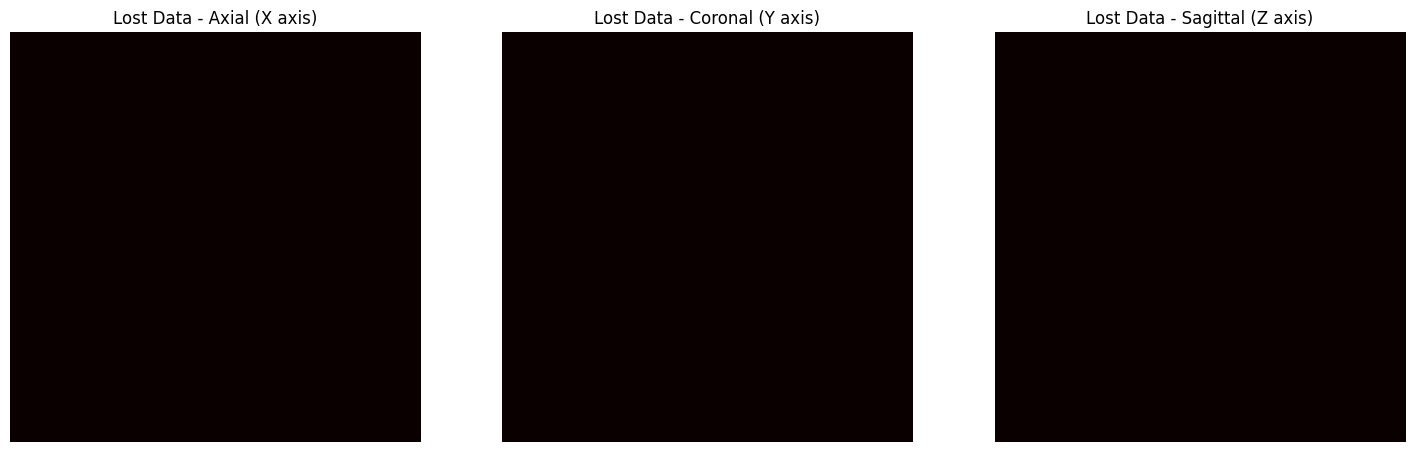

In [13]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# NIfTI 파일 경로 설정
transformed_path = '/home/alpaco/jk/deskin/de/subjects/bert/mri/transformed_output.nii'
desikan_t1_path = '/home/alpaco/jk/jk_2/desikan_t1.nii'

# NIfTI 파일 로드
transformed_img = nib.load(transformed_path)
desikan_t1_img = nib.load(desikan_t1_path)

# 데이터 배열 가져오기
transformed_data = transformed_img.get_fdata()
desikan_t1_data = desikan_t1_img.get_fdata()

# 축소된 크기를 확인
print("Transformed Data shape:", transformed_data.shape)
print("Desikan T1 Data shape:", desikan_t1_data.shape)

# 손실된 부분을 구하기 위해 transformed_data에서 desikan_t1_data 크기만큼 자르기
x_size, y_size, z_size = desikan_t1_data.shape

# x, y, z축에서 잃어버린 영역을 시각화하는 함수
def visualize_lost_data(transformed_data, desikan_t1_data, title1, title2):
    # 축소된 영역
    lost_data_x = transformed_data[x_size:, :, :]  # x축 손실 부분
    lost_data_y = transformed_data[:, y_size:, :]  # y축 손실 부분
    lost_data_z = transformed_data[:, :, z_size:]  # z축 손실 부분

    plt.figure(figsize=(18, 6))

    # Axial 슬라이스 (Z축)
    plt.subplot(1, 3, 1)
    plt.title(f"Lost Data - Axial (X axis)")
    plt.imshow(lost_data_x[lost_data_x.shape[0] // 2, :, :], cmap='hot')  # X축 손실된 부분
    plt.axis('off')

    # Coronal 슬라이스 (Y축)
    plt.subplot(1, 3, 2)
    plt.title(f"Lost Data - Coronal (Y axis)")
    plt.imshow(lost_data_y[:, lost_data_y.shape[1] // 2, :], cmap='hot')  # Y축 손실된 부분
    plt.axis('off')

    # Sagittal 슬라이스 (X축)
    plt.subplot(1, 3, 3)
    plt.title(f"Lost Data - Sagittal (Z axis)")
    plt.imshow(lost_data_z[:, :, lost_data_z.shape[2] // 2], cmap='hot')  # Z축 손실된 부분
    plt.axis('off')

    plt.show()

# 시각화 수행
visualize_lost_data(transformed_data, desikan_t1_data, "Transformed Data", "Desikan T1 Data")


# 4. desikan_t1 , T1 overay 시켜서 찍어보기

4. desikan_t1 , T1 overay 시켜서 찍어보기

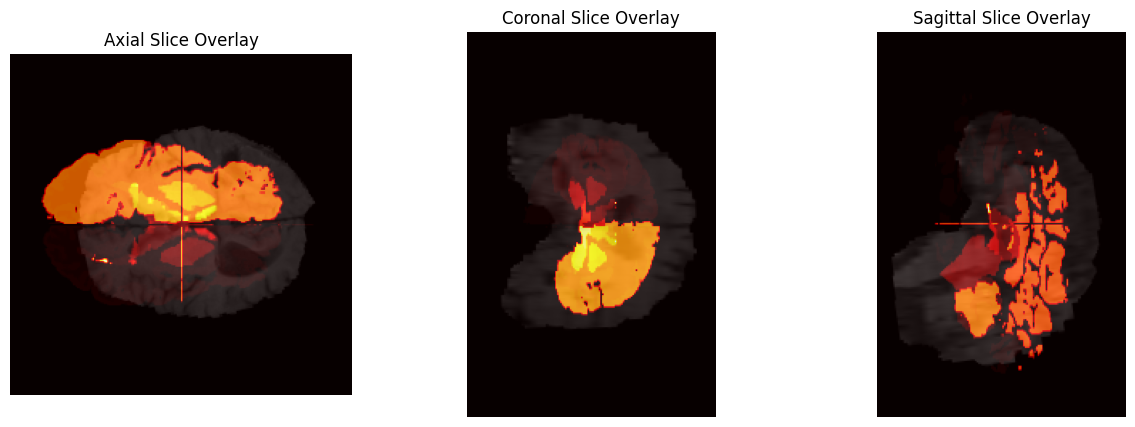

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
    
# NIfTI 파일 경로 설정
T1_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_t1.nii'
desikan_t1_path = '/home/alpaco/jk/jk_2/desikan_t1.nii'

# NIfTI 파일 로드
T1_img = nib.load(T1_path)
desikan_t1_img = nib.load(desikan_t1_path)

# 데이터 배열 가져오기
T1_data = T1_img.get_fdata()
desikan_t1_data = desikan_t1_img.get_fdata()

# 시각화할 중간 슬라이스 선택
axial_idx = T1_data.shape[2] // 2  # Z축 중간 슬라이스
coronal_idx = T1_data.shape[1] // 2  # Y축 중간 슬라이스
sagittal_idx = T1_data.shape[0] // 2  # X축 중간 슬라이스

# 두 이미지를 오버레이하기 위한 함수 (각 축에 대해)
def overlay_images(T1_data, desikan_t1_data, axial_idx, coronal_idx, sagittal_idx):
    # Axial (Z축) 슬라이스
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(T1_data[:, :, axial_idx], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(desikan_t1_data[:, :, axial_idx], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.5)
    plt.title("Axial Slice Overlay")
    plt.axis('off')

    # Coronal (Y축) 슬라이스
    plt.subplot(1, 3, 2)
    plt.imshow(T1_data[:, coronal_idx, :], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(desikan_t1_data[:, coronal_idx, :], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.5)
    plt.title("Coronal Slice Overlay")
    plt.axis('off')

    # Sagittal (X축) 슬라이스
    plt.subplot(1, 3, 3)
    plt.imshow(T1_data[sagittal_idx, :, :], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(desikan_t1_data[sagittal_idx, :, :], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.5)
    plt.title("Sagittal Slice Overlay")
    plt.axis('off')

    plt.show()

# 시각화 수행
overlay_images(T1_data, desikan_t1_data, axial_idx, coronal_idx, sagittal_idx)


# 5. B = T1 에 affin변환 시키기 - 실패

5. B = T1 에 affin변환 시키기 - 실패

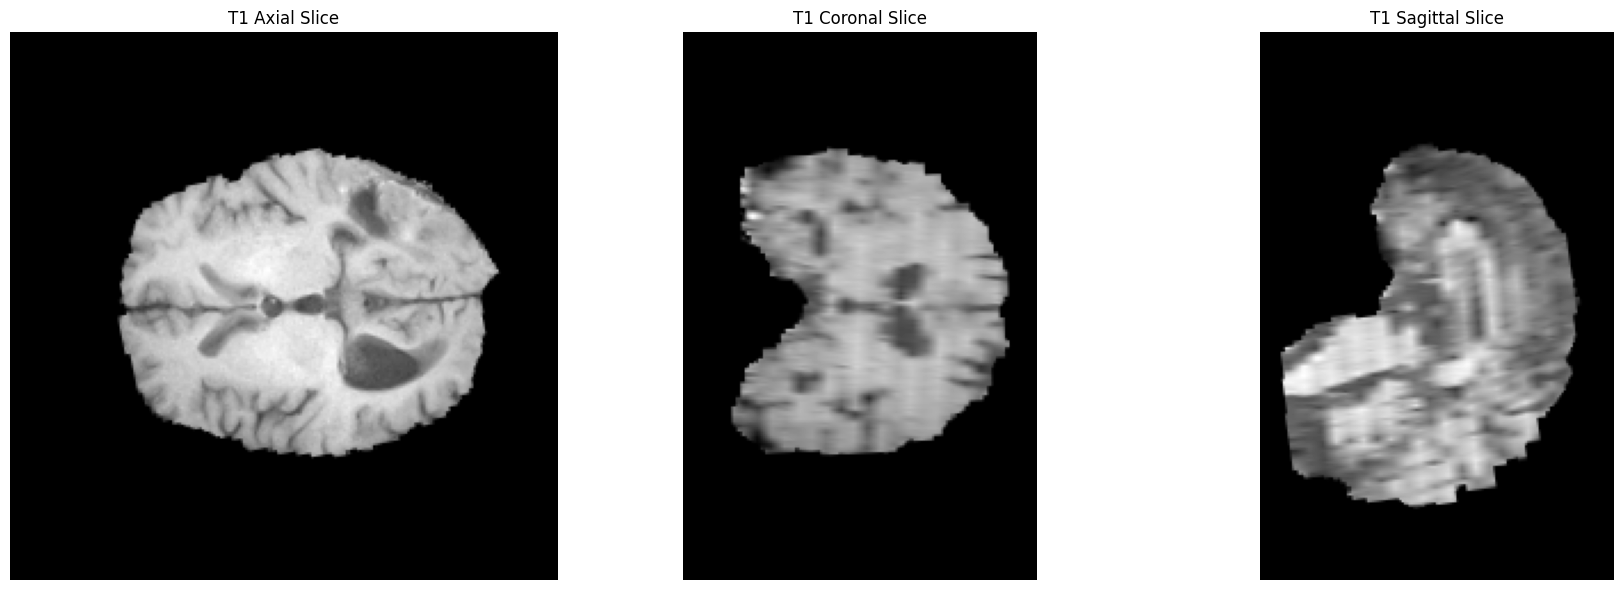

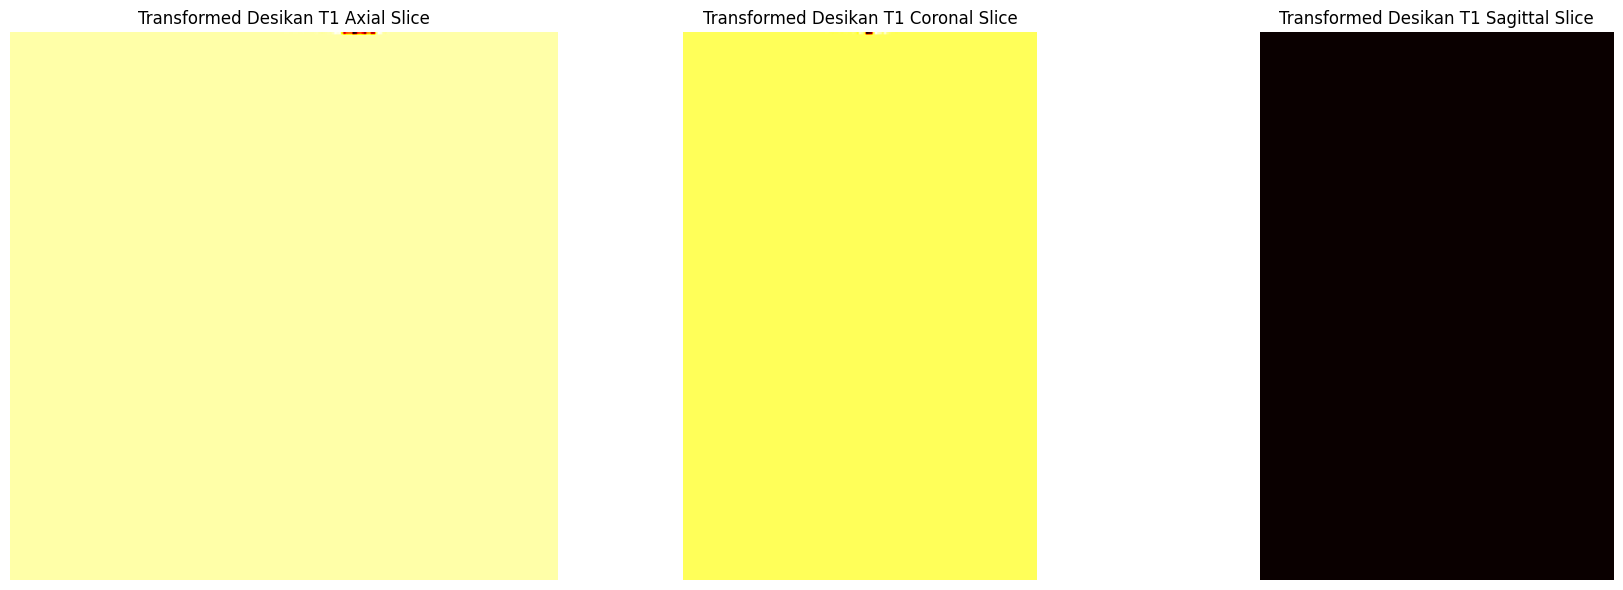

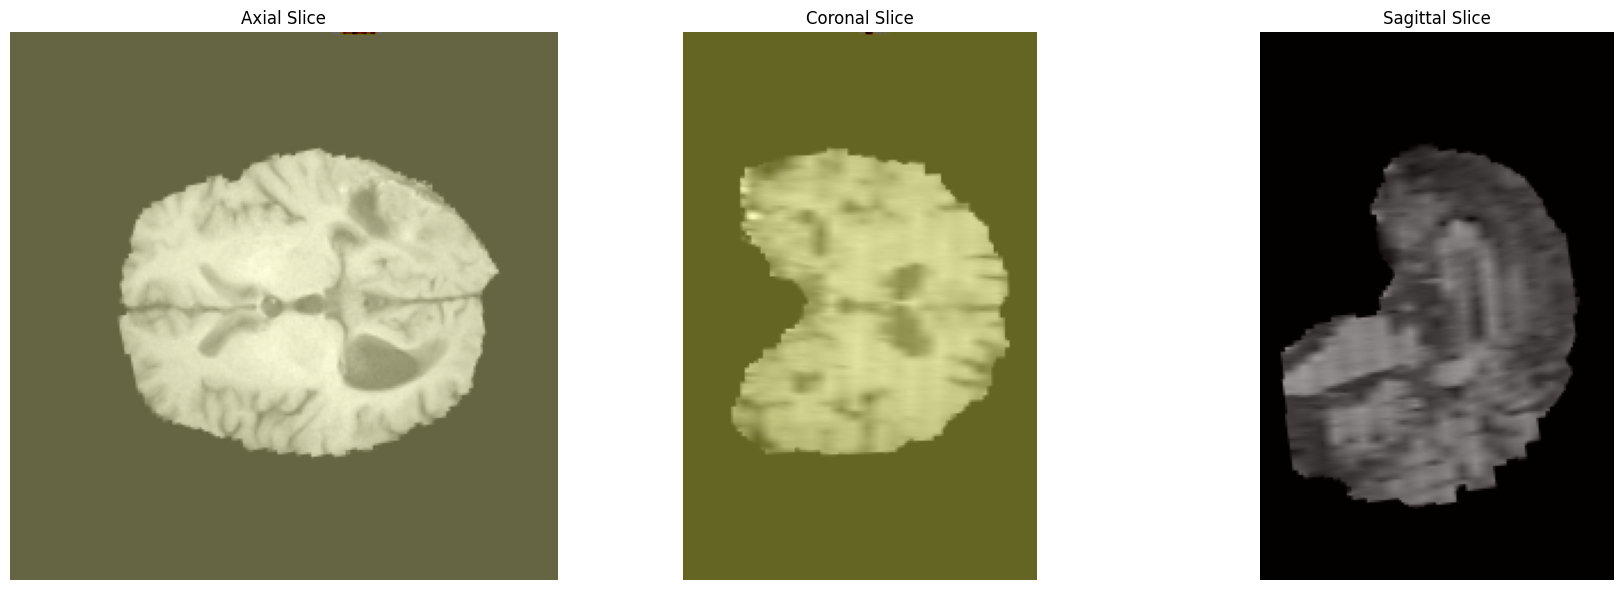

T1 Data Shape: (240, 240, 155)
Desikan T1 Data Shape: (240, 240, 155)
Transformed Desikan T1 Data Shape: (240, 240, 155)


In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

# NIfTI 파일 경로 설정
T1_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_t1.nii'
desikan_t1_path = '/home/alpaco/jk/jk_2/desikan_t1.nii'

# NIfTI 파일 로드
T1_img = nib.load(T1_path)
desikan_t1_img = nib.load(desikan_t1_path)

# 데이터 배열 가져오기
T1_data = T1_img.get_fdata()
desikan_t1_data = desikan_t1_img.get_fdata()

# 아핀 변환을 위한 affine 매트릭스
T1_affine = T1_img.affine  # T1 이미지의 affine 매트릭스를 사용

# desikan_t1 이미지를 T1 이미지의 affine에 맞게 재샘플링
desikan_t1_transformed = affine_transform(desikan_t1_data, T1_affine[:3, :3], offset=T1_affine[:3, 3])

# 변환된 데이터를 새로운 NIfTI 파일로 저장
desikan_t1_transformed_img = nib.Nifti1Image(desikan_t1_transformed, T1_affine)
output_path = '/home/alpaco/jk/jk_2/Brats18_2013_19_1_A.nii'
nib.save(desikan_t1_transformed_img, output_path)

# 두 이미지를 오버레이하기 위한 함수 (x, y, z축 슬라이스 시각화 포함)
def overlay_images(T1_data, desikan_t1_transformed):
    axial_idx = T1_data.shape[2] // 2  # Z축 중간 슬라이스
    coronal_idx = T1_data.shape[1] // 2  # Y축 중간 슬라이스
    sagittal_idx = T1_data.shape[0] // 2  # X축 중간 슬라이스

    # 각 축의 중간 슬라이스에 대해 T1과 변환된 Desikan T1 오버레이
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Axial 슬라이스 (Z축)
    axes[0].imshow(T1_data[:, :, axial_idx], cmap='gray', alpha=1.0)  # T1 이미지
    axes[0].imshow(desikan_t1_transformed[:, :, axial_idx], cmap='hot', alpha=0.4)  # Desikan T1 이미지 오버레이 (Alpha 0.4)
    axes[0].axis('off')
    axes[0].set_title("Axial Slice")

    # Coronal 슬라이스 (Y축)
    axes[1].imshow(T1_data[:, coronal_idx, :], cmap='gray', alpha=1.0)  # T1 이미지
    axes[1].imshow(desikan_t1_transformed[:, coronal_idx, :], cmap='hot', alpha=0.4)  # Desikan T1 이미지 오버레이 (Alpha 0.4)
    axes[1].axis('off')
    axes[1].set_title("Coronal Slice")

    # Sagittal 슬라이스 (X축)
    axes[2].imshow(T1_data[sagittal_idx, :, :], cmap='gray', alpha=1.0)  # T1 이미지
    axes[2].imshow(desikan_t1_transformed[sagittal_idx, :, :], cmap='hot', alpha=0.4)  # Desikan T1 이미지 오버레이 (Alpha 0.4)
    axes[2].axis('off')
    axes[2].set_title("Sagittal Slice")

    plt.tight_layout()
    plt.show()

# T1 데이터 시각화
def visualize_image(T1_data, desikan_t1_transformed):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axial_idx = T1_data.shape[2] // 2  # Z축 중간 슬라이스
    coronal_idx = T1_data.shape[1] // 2  # Y축 중간 슬라이스
    sagittal_idx = T1_data.shape[0] // 2  # X축 중간 슬라이스

    # Axial 슬라이스 (Z축)
    axes[0].imshow(T1_data[:, :, axial_idx], cmap='gray', alpha=1.0)  # T1 이미지
    axes[0].axis('off')
    axes[0].set_title("T1 Axial Slice")

    # Coronal 슬라이스 (Y축)
    axes[1].imshow(T1_data[:, coronal_idx, :], cmap='gray', alpha=1.0)  # T1 이미지
    axes[1].axis('off')
    axes[1].set_title("T1 Coronal Slice")

    # Sagittal 슬라이스 (X축)
    axes[2].imshow(T1_data[sagittal_idx, :, :], cmap='gray', alpha=1.0)  # T1 이미지
    axes[2].axis('off')
    axes[2].set_title("T1 Sagittal Slice")

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Axial 슬라이스 (Z축)
    axes[0].imshow(desikan_t1_transformed[:, :, axial_idx], cmap='hot', alpha=1.0)  # 변환된 Desikan T1 이미지
    axes[0].axis('off')
    axes[0].set_title("Transformed Desikan T1 Axial Slice")

    # Coronal 슬라이스 (Y축)
    axes[1].imshow(desikan_t1_transformed[:, coronal_idx, :], cmap='hot', alpha=1.0)  # 변환된 Desikan T1 이미지
    axes[1].axis('off')
    axes[1].set_title("Transformed Desikan T1 Coronal Slice")

    # Sagittal 슬라이스 (X축)
    axes[2].imshow(desikan_t1_transformed[sagittal_idx, :, :], cmap='hot', alpha=1.0)  # 변환된 Desikan T1 이미지
    axes[2].axis('off')
    axes[2].set_title("Transformed Desikan T1 Sagittal Slice")

    plt.tight_layout()
    plt.show()

    # 두 이미지를 오버레이
    overlay_images(T1_data, desikan_t1_transformed)

# 시각화 수행
visualize_image(T1_data, desikan_t1_transformed)

# 각 이미지의 shape 출력
print("T1 Data Shape:", T1_data.shape)
print("Desikan T1 Data Shape:", desikan_t1_data.shape)
print("Transformed Desikan T1 Data Shape:", desikan_t1_transformed.shape)


# 5. B = T1 에 affin변환 시키기 - 재시도

In [4]:
!pip install SimpleITK

In [5]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 2
         Function evaluations: 280


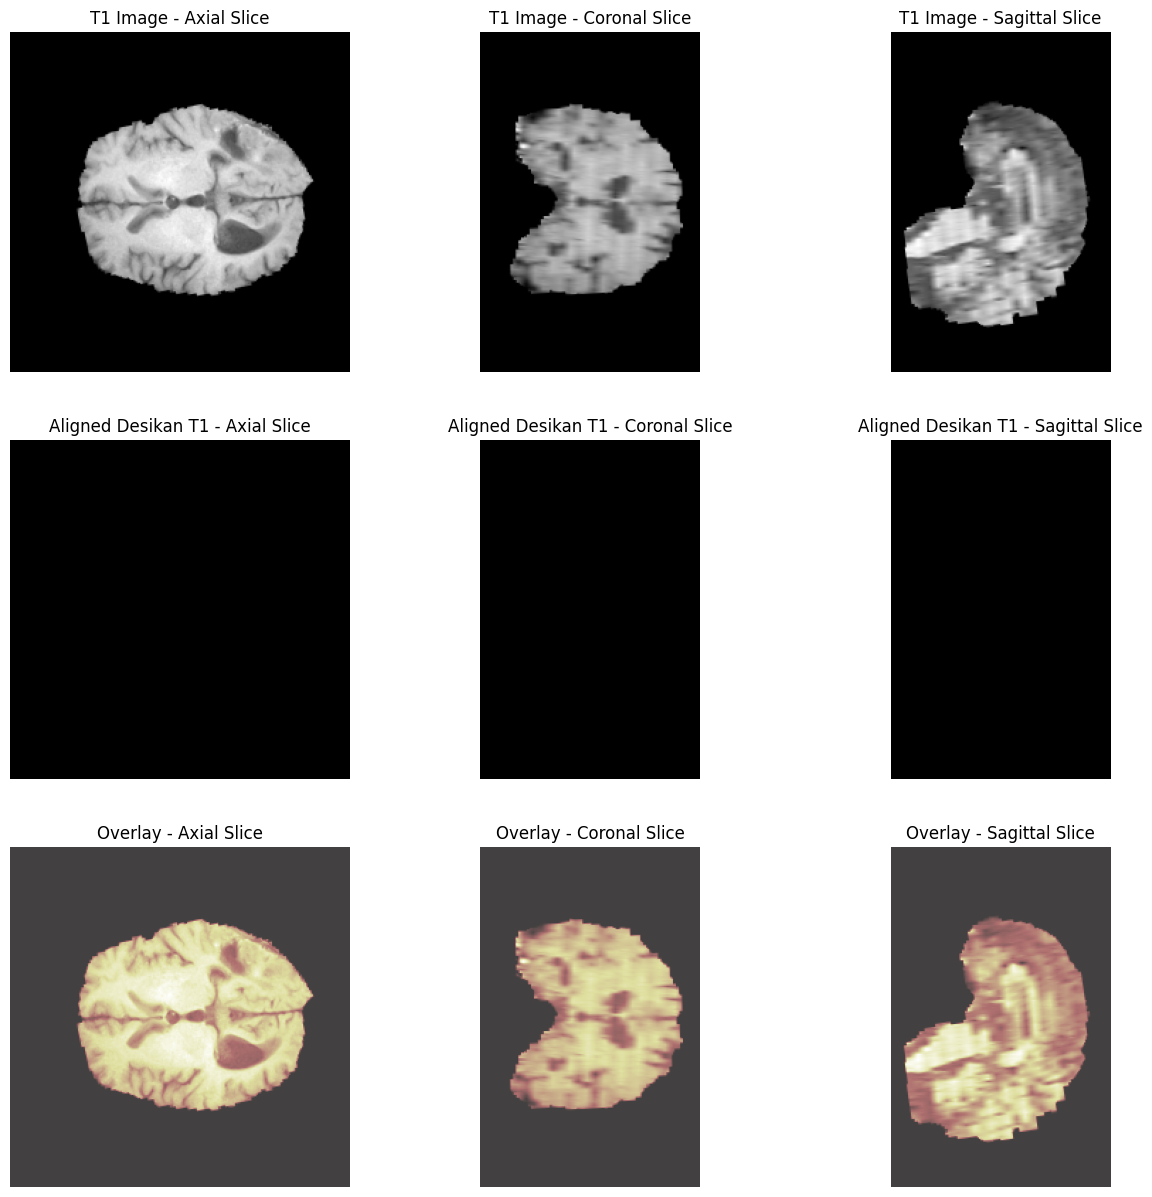

T1 data shape: (240, 240, 155)
Desikan T1 data shape: (240, 240, 155)
Aligned Desikan T1 data shape: (240, 240, 155)
Aligned Desikan T1 image saved at: /home/alpaco/jk/jk_2/desikan_t1_aligned.nii


In [42]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from scipy.optimize import minimize

# NIfTI 파일 경로 설정
T1_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_t1.nii'
desikan_t1_path = '/home/alpaco/jk/jk_2/desikan_t1.nii'

# NIfTI 파일 로드
T1_img = nib.load(T1_path)
desikan_t1_img = nib.load(desikan_t1_path)

# 데이터 배열 가져오기
T1_data = T1_img.get_fdata()
desikan_t1_data = desikan_t1_img.get_fdata()

# Normalize 이미지 (픽셀 값 스케일링)
T1_data = (T1_data - np.min(T1_data)) / (np.max(T1_data) - np.min(T1_data))
desikan_t1_data = (desikan_t1_data - np.min(desikan_t1_data)) / (np.max(desikan_t1_data) - np.min(desikan_t1_data))

# Similarity Metric: Normalized Cross-Correlation (NCC)
def normalized_cross_correlation(fixed, moving):
    """
    NCC 계산: 고정 이미지(fixed)와 이동 이미지(moving)의 정규화된 교차 상관계수.
    """
    fixed_mean = np.mean(fixed)
    moving_mean = np.mean(moving)

    numerator = np.sum((fixed - fixed_mean) * (moving - moving_mean))
    denominator = np.sqrt(np.sum((fixed - fixed_mean) ** 2) * np.sum((moving - moving_mean) ** 2))
    return numerator / denominator if denominator != 0 else 0

# Cost Function (NCC를 최대화하려면 음수를 취해 최소화 문제로 전환)
def cost_function(params, fixed, moving):
    """
    주어진 변환 파라미터에 따라 이동 이미지를 변환한 후, NCC의 음수를 반환.
    """
    # Affine 변환 행렬 생성
    transform_matrix = np.eye(4)
    transform_matrix[:3, :3] = params[:9].reshape(3, 3)  # 회전 및 스케일
    transform_matrix[:3, 3] = params[9:]  # 이동

    # 이동 이미지 변환
    transformed_moving = affine_transform(moving, transform_matrix[:3, :3], offset=params[9:], order=1)

    # 유효 영역만 사용하여 NCC 계산
    valid_mask = np.logical_and(fixed > 0, transformed_moving > 0)
    if not np.any(valid_mask):
        return -1  # NCC 최소값을 반환

    ncc_value = normalized_cross_correlation(fixed[valid_mask], transformed_moving[valid_mask])
    return -ncc_value  # NCC를 최대화하려면 음수 반환

# 초기 변환 파라미터 (항등 행렬 + 0 이동)
initial_params = np.hstack([np.eye(3).flatten(), [0, 0, 0]])

# 최적화 수행
result = minimize(
    cost_function,
    initial_params,
    args=(T1_data, desikan_t1_data),
    method='Powell',
    options={'maxiter': 50, 'disp': True}
)

# 최적화 결과로 이동 이미지 변환
optimized_params = result.x
optimized_matrix = np.eye(4)
optimized_matrix[:3, :3] = optimized_params[:9].reshape(3, 3)
optimized_matrix[:3, 3] = optimized_params[9:]

desikan_t1_aligned = affine_transform(desikan_t1_data, optimized_matrix[:3, :3], offset=optimized_params[9:], order=1)

# 시각화할 중간 슬라이스 선택
axial_idx = T1_data.shape[2] // 2  # Z축 중간 슬라이스
coronal_idx = T1_data.shape[1] // 2  # Y축 중간 슬라이스
sagittal_idx = T1_data.shape[0] // 2  # X축 중간 슬라이스

# 시각화할 이미지 별로 따로 출력하는 함수
def visualize_images(T1_data, aligned_data, overlay_data, axial_idx, coronal_idx, sagittal_idx):
    # T1 이미지 (Axial, Coronal, Sagittal 슬라이스)
    plt.figure(figsize=(15, 15))

    # T1 Axial Slice
    plt.subplot(3, 3, 1)
    plt.imshow(T1_data[:, :, axial_idx], cmap='gray')
    plt.title("T1 Image - Axial Slice")
    plt.axis('off')

    # T1 Coronal Slice
    plt.subplot(3, 3, 2)
    plt.imshow(T1_data[:, coronal_idx, :], cmap='gray')
    plt.title("T1 Image - Coronal Slice")
    plt.axis('off')

    # T1 Sagittal Slice
    plt.subplot(3, 3, 3)
    plt.imshow(T1_data[sagittal_idx, :, :], cmap='gray')
    plt.title("T1 Image - Sagittal Slice")
    plt.axis('off')

    # Aligned Desikan T1 Image (Axial, Coronal, Sagittal 슬라이스)
    plt.subplot(3, 3, 4)
    plt.imshow(aligned_data[:, :, axial_idx], cmap='gray')
    plt.title("Aligned Desikan T1 - Axial Slice")
    plt.axis('off')

    plt.subplot(3, 3, 5)
    plt.imshow(aligned_data[:, coronal_idx, :], cmap='gray')
    plt.title("Aligned Desikan T1 - Coronal Slice")
    plt.axis('off')

    plt.subplot(3, 3, 6)
    plt.imshow(aligned_data[sagittal_idx, :, :], cmap='gray')
    plt.title("Aligned Desikan T1 - Sagittal Slice")
    plt.axis('off')

    # Overlay (T1 + Aligned Desikan T1) (Axial, Coronal, Sagittal 슬라이스)
    plt.subplot(3, 3, 7)
    plt.imshow(overlay_data[:, :, axial_idx], cmap='hot', alpha=0.5)
    plt.imshow(T1_data[:, :, axial_idx], cmap='gray', alpha=0.5)
    plt.title("Overlay - Axial Slice")
    plt.axis('off')

    plt.subplot(3, 3, 8)
    plt.imshow(overlay_data[:, coronal_idx, :], cmap='hot', alpha=0.5)
    plt.imshow(T1_data[:, coronal_idx, :], cmap='gray', alpha=0.5)
    plt.title("Overlay - Coronal Slice")
    plt.axis('off')

    plt.subplot(3, 3, 9)
    plt.imshow(overlay_data[sagittal_idx, :, :], cmap='hot', alpha=0.5)
    plt.imshow(T1_data[sagittal_idx, :, :], cmap='gray', alpha=0.5)
    plt.title("Overlay - Sagittal Slice")
    plt.axis('off')

    plt.show()

# 시각화 수행
visualize_images(T1_data, desikan_t1_aligned, T1_data, axial_idx, coronal_idx, sagittal_idx)

# T1 데이터와 desikan_t1_aligned의 Shape 출력
print(f"T1 data shape: {T1_data.shape}")
print(f"Desikan T1 data shape: {desikan_t1_data.shape}")
print(f"Aligned Desikan T1 data shape: {desikan_t1_aligned.shape}")

# Desikan T1 이미지를 NIfTI 형식으로 저장
aligned_desikan_img = nib.Nifti1Image(desikan_t1_aligned, desikan_t1_img.affine)
aligned_desikan_path = '/home/alpaco/jk/jk_2/desikan_t1_aligned.nii'
nib.save(aligned_desikan_img, aligned_desikan_path)
print(f"Aligned Desikan T1 image saved at: {aligned_desikan_path}")


In [43]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# 파일 로드
T1_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_t1.nii'
desikan_t1_path = '/home/alpaco/jk/jk_2/desikan_t1.nii'

T1_image = sitk.ReadImage(T1_path, sitk.sitkFloat32)
moving_image = sitk.ReadImage(desikan_t1_path, sitk.sitkFloat32)

# 정렬 객체 설정
registration_method = sitk.ImageRegistrationMethod()

# Similarity Metric 설정 (Normalized Mutual Information 사용)
registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)

# Optimizer 설정
registration_method.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100)
registration_method.SetOptimizerScalesFromPhysicalShift()

# Transform 초기값 설정
initial_transform = sitk.CenteredTransformInitializer(
    T1_image,
    moving_image,
    sitk.AffineTransform(3),
    sitk.CenteredTransformInitializerFilter.GEOMETRY
)
registration_method.SetInitialTransform(initial_transform, inPlace=False)

# 정렬 수행
final_transform = registration_method.Execute(T1_image, moving_image)

# 이동 이미지 변환 (AAL 데이터 리샘플링)
moving_resampled = sitk.Resample(
    moving_image,
    T1_image,
    final_transform,
    sitk.sitkNearestNeighbor,  # 마스크 데이터이므로 Nearest Neighbor 사용
    0.0,
    moving_image.GetPixelID()
)

# NumPy 배열로 변환
fixed_np = sitk.GetArrayFromImage(T1_image)
moving_np = sitk.GetArrayFromImage(moving_resampled)

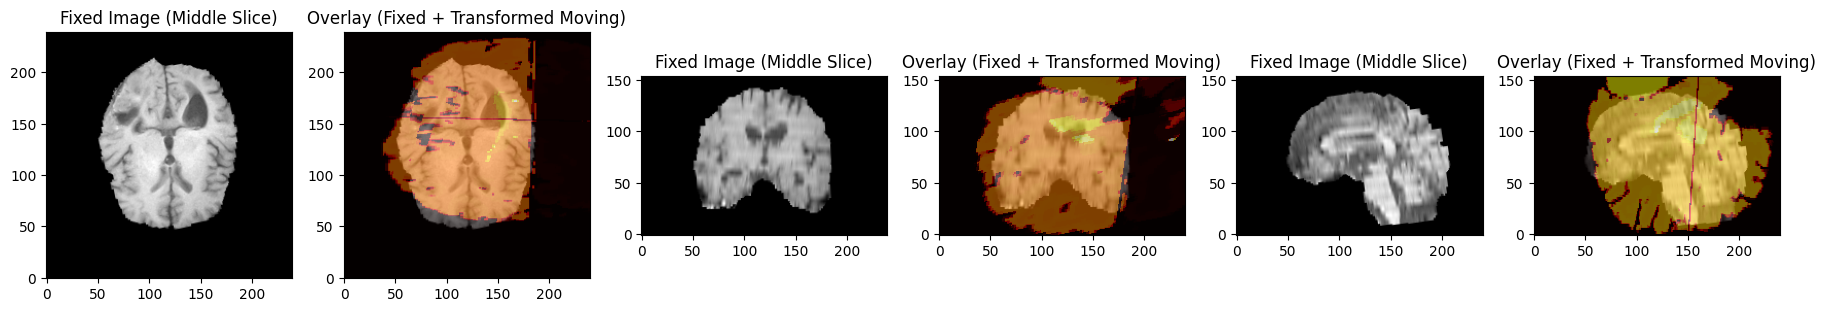

In [47]:
# 중간 슬라이스 시각화
slice_index_A = fixed_np.shape[0] // 2
slice_index_C = fixed_np.shape[1] // 2
slice_index_S = fixed_np.shape[2] // 2

#slice_index = 140
fixed_slice_A = fixed_np[slice_index_A, :, :]
moving_slice_A = moving_np[slice_index_A, :, :]
fixed_slice_C = fixed_np[:, slice_index_C, :]
moving_slice_C = moving_np[:, slice_index_C, :]
fixed_slice_S = fixed_np[:, :, slice_index_S]
moving_slice_S = moving_np[:, :, slice_index_S]


plt.figure(figsize=(18, 6))
plt.subplot(1, 6, 1)
plt.title("Fixed Image (Middle Slice)")
plt.imshow(fixed_slice_A, cmap='gray', origin='lower')

plt.subplot(1, 6, 2)
plt.title("Overlay (Fixed + Transformed Moving)")
plt.imshow(fixed_slice_A, cmap='gray', origin='lower')
plt.imshow(moving_slice_A, cmap='hot', alpha=0.5, origin='lower')

plt.subplot(1, 6, 3)
plt.title("Fixed Image (Middle Slice)")
plt.imshow(fixed_slice_C, cmap='gray', origin='lower')

plt.subplot(1, 6, 4)
plt.title("Overlay (Fixed + Transformed Moving)")
plt.imshow(fixed_slice_C, cmap='gray', origin='lower')
plt.imshow(moving_slice_C, cmap='hot', alpha=0.5, origin='lower')

plt.subplot(1, 6, 5)
plt.title("Fixed Image (Middle Slice)")
plt.imshow(fixed_slice_S, cmap='gray', origin='lower')

plt.subplot(1, 6, 6)
plt.title("Overlay (Fixed + Transformed Moving)")
plt.imshow(fixed_slice_S, cmap='gray', origin='lower')
plt.imshow(moving_slice_S, cmap='hot', alpha=0.5, origin='lower')

plt.tight_layout()
plt.show()



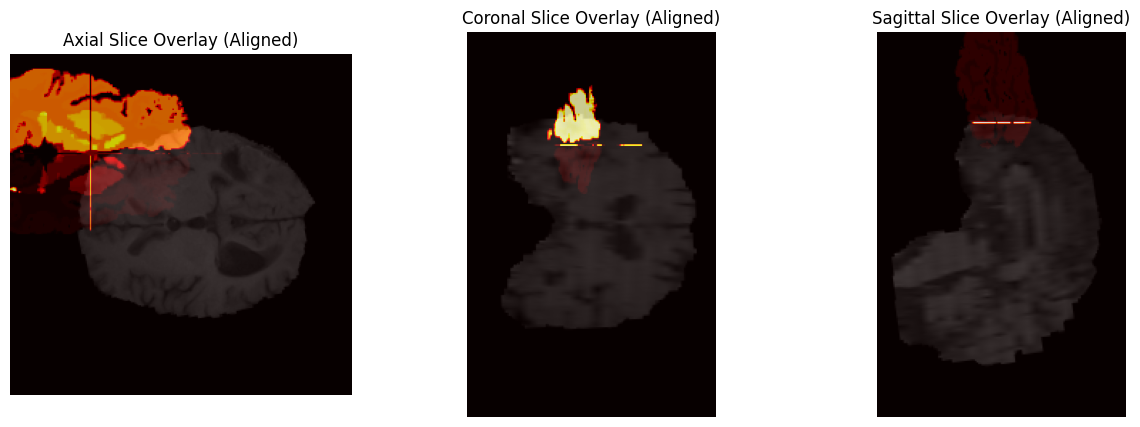

In [49]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
from skimage.registration import phase_cross_correlation
from skimage.transform import AffineTransform, warp

# NIfTI 파일 경로 설정
T1_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_t1.nii'
desikan_t1_path = '/home/alpaco/jk/jk_2/desikan_t1.nii'

# NIfTI 파일 로드
T1_img = nib.load(T1_path)
desikan_t1_img = nib.load(desikan_t1_path)

# 데이터 배열 가져오기
T1_data = T1_img.get_fdata()
desikan_t1_data = desikan_t1_img.get_fdata()

# 두 이미지 간의 회전 및 크기 맞추기 위한 Affine 변환 추정 (Cross-correlation 기반)
shift, error, diffphase = phase_cross_correlation(T1_data, desikan_t1_data)

# 이동 변환을 수행하기 위해 Affine 변환 생성
transform = AffineTransform(translation=shift)

# Desikan T1 데이터에 변환 적용
aligned_desikan_t1_data = warp(desikan_t1_data, transform)

# 시각화할 중간 슬라이스 선택
axial_idx = T1_data.shape[2] // 2  # Z축 중간 슬라이스
coronal_idx = T1_data.shape[1] // 2  # Y축 중간 슬라이스
sagittal_idx = T1_data.shape[0] // 2  # X축 중간 슬라이스

# 두 이미지를 오버레이하기 위한 함수 (각 축에 대해)
def overlay_images(T1_data, aligned_desikan_t1_data, axial_idx, coronal_idx, sagittal_idx):
    # Axial (Z축) 슬라이스
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(T1_data[:, :, axial_idx], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(aligned_desikan_t1_data[:, :, axial_idx], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.8)
    plt.title("Axial Slice Overlay (Aligned)")
    plt.axis('off')

    # Coronal (Y축) 슬라이스
    plt.subplot(1, 3, 2)
    plt.imshow(T1_data[:, coronal_idx, :], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(aligned_desikan_t1_data[:, coronal_idx, :], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.8)
    plt.title("Coronal Slice Overlay (Aligned)")
    plt.axis('off')

    # Sagittal (X축) 슬라이스
    plt.subplot(1, 3, 3)
    plt.imshow(T1_data[sagittal_idx, :, :], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(aligned_desikan_t1_data[sagittal_idx, :, :], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.8)
    plt.title("Sagittal Slice Overlay (Aligned)")
    plt.axis('off')

    plt.show()

# 시각화 수행
overlay_images(T1_data, aligned_desikan_t1_data, axial_idx, coronal_idx, sagittal_idx)


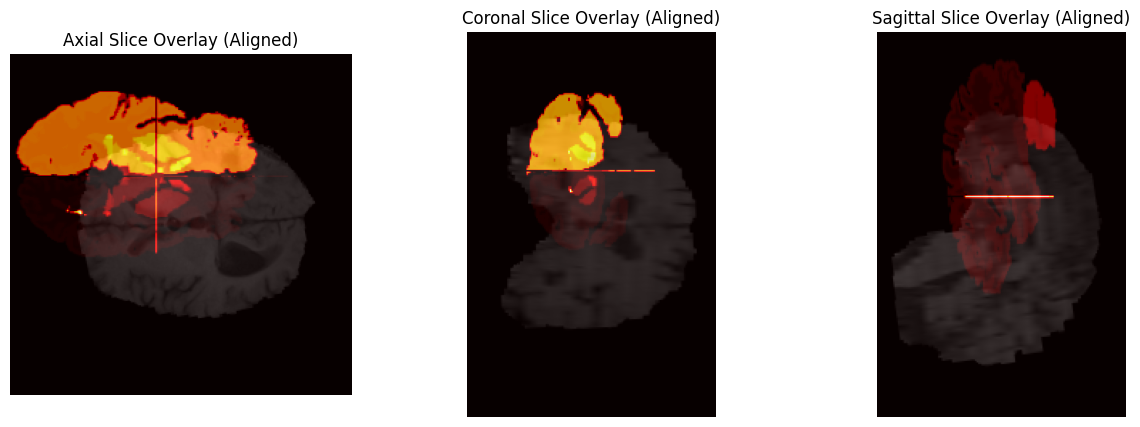

In [52]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.registration import phase_cross_correlation
from skimage.transform import AffineTransform, warp
from scipy.ndimage import center_of_mass

# NIfTI 파일 경로 설정
T1_path = '/home/alpaco/jk/miccai-brats2018-original-dataset/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_19_1/Brats18_2013_19_1_t1.nii'
desikan_t1_path = '/home/alpaco/jk/jk_2/desikan_t1.nii'

# NIfTI 파일 로드
T1_img = nib.load(T1_path)
desikan_t1_img = nib.load(desikan_t1_path)

# 데이터 배열 가져오기
T1_data = T1_img.get_fdata()
desikan_t1_data = desikan_t1_img.get_fdata()

# 두 이미지의 중심을 계산하여 차이를 맞춤
T1_center = center_of_mass(T1_data)
desikan_t1_center = center_of_mass(desikan_t1_data)

# 두 이미지의 중심 차이 계산
shift = np.array(T1_center) - np.array(desikan_t1_center)

# 이동 변환을 수행하기 위해 Affine 변환 생성
transform = AffineTransform(translation=shift)

# Desikan T1 데이터에 변환 적용
aligned_desikan_t1_data = warp(desikan_t1_data, transform)

# 시각화할 중간 슬라이스 선택
axial_idx = T1_data.shape[2] // 2  # Z축 중간 슬라이스
coronal_idx = T1_data.shape[1] // 2  # Y축 중간 슬라이스
sagittal_idx = T1_data.shape[0] // 2  # X축 중간 슬라이스

# 두 이미지를 오버레이하기 위한 함수 (각 축에 대해)
def overlay_images(T1_data, aligned_desikan_t1_data, axial_idx, coronal_idx, sagittal_idx):
    # Axial (Z축) 슬라이스
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(T1_data[:, :, axial_idx], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(aligned_desikan_t1_data[:, :, axial_idx], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.8)
    plt.title("Axial Slice Overlay (Aligned)")
    plt.axis('off')

    # Coronal (Y축) 슬라이스
    plt.subplot(1, 3, 2)
    plt.imshow(T1_data[:, coronal_idx, :], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(aligned_desikan_t1_data[:, coronal_idx, :], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.8)
    plt.title("Coronal Slice Overlay (Aligned)")
    plt.axis('off')

    # Sagittal (X축) 슬라이스
    plt.subplot(1, 3, 3)
    plt.imshow(T1_data[sagittal_idx, :, :], cmap='gray', alpha=1.0)  # T1 이미지
    plt.imshow(aligned_desikan_t1_data[sagittal_idx, :, :], cmap='hot', alpha=0.8)  # Desikan T1 이미지 오버레이 (투명도 0.8)
    plt.title("Sagittal Slice Overlay (Aligned)")
    plt.axis('off')

    plt.show()

# 시각화 수행
overlay_images(T1_data, aligned_desikan_t1_data, axial_idx, coronal_idx, sagittal_idx)
